In [63]:
!pip install tensorflow

In [64]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = '/content/drive/MyDrive/Datasets/'

# Check if dataset exists and load, else print a message
if os.path.exists(file_path):
    df = pd.read_csv(file_path+'Housing.csv')
    print("Data loaded from Google Drive.")
else:
    print("Data not found. Please import the dataset and save it as shown.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded from Google Drive.


In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
# Global variables
RANDOM_STATE = 24

TEST_SIZE = 0.2

inpDir = '/content/drive/MyDrive/Datasets/breast_cancer_mod.csv'
outDir = '/content/drive/MyDrive/Datasets'

# Set plotting parameters
params = {'legend.fontsize':'medium',
          'figure.figsize': (15, 4),
          'axes.titlesize':'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'}
plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('ggplot')

In [67]:
file = '/content/drive/MyDrive/Datasets/breast_cancer_mod.csv'
df=pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [68]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000
mean,0.820738,0.880492,0.827768,0.954306,0.811951,0.910369,0.917399,0.899824,0.831283,0.927944,...,0.790861,0.868190,0.966608,0.762742,0.942004,0.926186,0.678383,0.956063,0.97891,0.627417
std,0.383909,0.324671,0.377914,0.209005,0.391095,0.285904,0.275520,0.300498,0.374831,0.258809,...,0.407052,0.338582,0.179816,0.425776,0.233942,0.261698,0.467508,0.205135,0.14381,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [69]:
df['target'].value_counts()

,count
target,
1,357
0,212


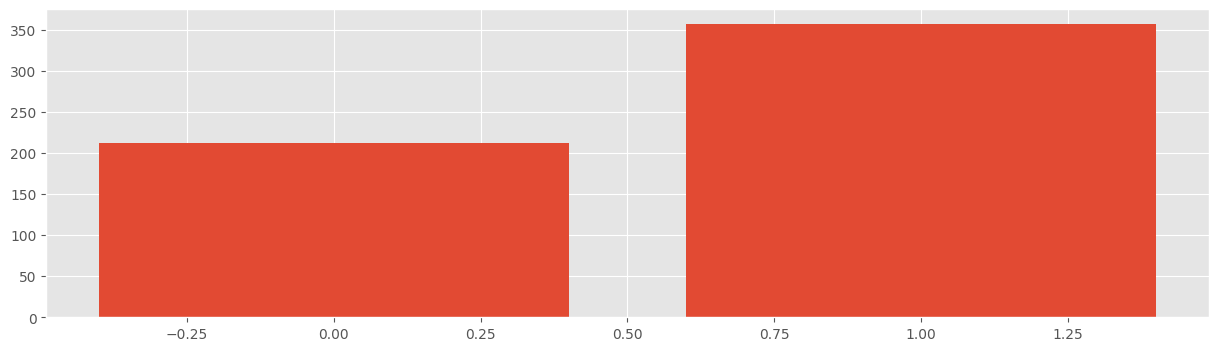

In [70]:
labels = ['malignant', 'benign']
fig, ax = plt.subplots()
ax.bar(df['target'].value_counts().index
       , df['target'].value_counts().values);
# add ';' to not get the text above plot/ using instead of plt.show()

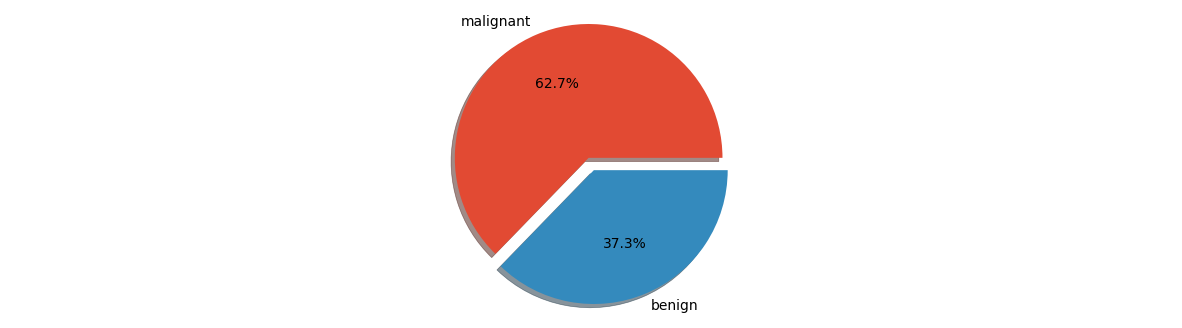

In [71]:
fig, ax = plt.subplots()
explode = (0.1, 0) # pulls out

ax.pie(df['target'].value_counts(),
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=0);
ax.axis('equal')
plt.show()

### Split data in test, train

In [72]:
features = df.drop('target', axis=1)
target = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [73]:
X_train['total']= X_train.astype(np.int16).sum(axis=1)
X_train['target']= y_train
X_train.sort_values('total', inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0


In [74]:
X_test['total']= X_test.fillna(0).astype(np.int16).sum(axis=1)
X_test['target']= y_test
X_test.sort_values('total', inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0
17,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,1,1,17,0


In [79]:
accuracy={}
for b in range(X_train.shape[0]): # LOOPING OVER COLUMNS
  X_train['pred'] = X_train['total'] >= b# Comparing with b to get output
  accuracy[b] = accuracy_score(y_true= X_train['target'], y_pred=X_train['pred'])

best_b = max(accuracy, key=accuracy.get)
best_b

27

In [81]:
accuracy[27]

0.8615384615384616

# On Testing data

In [80]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(y_true= X_test['target'], y_pred=X_test['pred'])

0.8245614035087719